In [78]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import mlab
from scipy import stats as stat


In [21]:
training_data[training_data['Cabin'].isna()].size


8244

In [2]:
training_data = pd.read_csv("data/train.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [54]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
# gets missed data
total = training_data.isnull().sum().sort_values(ascending=False)
percentage = round(training_data.isnull().sum()/training_data.isnull().count()*100, 1).sort_values(ascending=False)
missing = pd.concat([total, percentage], axis=1, keys=['total', '%'])
missing

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [197]:
# working with Cabin column, 1st letter is for Titanic deck (which could be important)
def parse_deck(cabin):
    if cabin is not None:
        cabin_str = str(cabin)
        if cabin_str != 'nan':
            return cabin_str[0]
        else:
            # print(cabin)
            return 'NaN'
    else:
        return "NaN"
    
    
deck_array = training_data['Cabin'].apply(parse_deck).sort_values().unique()

decks = pd.DataFrame(deck_array, columns=["Deck"])
# decks.set_index('Deck').T
# deck_array
test = pd.DataFrame([], columns=deck_array)
test
test.append({'A': True}, ignore_index=True)

,A,B,C,D,E,F,G,NaN,T
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
def generate_decks_data(row, empty_df):
    deck = parse_deck(row['Cabin'])
    return empty_df.append({deck: 1, 'PassengerId': row['PassengerId']}, ignore_index=True).iloc[0]
    # return  deck


d = training_data.apply(generate_decks_data, axis=1, args=(test,)).fillna(0)
d.head(10)

,A,B,C,D,E,F,G,NaN,T,PassengerId
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0


In [199]:

ntr_data = pd.merge(training_data, d, how='left', on='PassengerId')
ntr_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,A,B,C,D,E,F,G,NaN,T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [206]:
def prefix_name_parser(name):
    return name[name.rfind(',')+1:name.rfind('.')].strip()


training_data['Name'].apply(prefix_name_parser).unique(
    


SyntaxError: unexpected EOF while parsing (<ipython-input-206-3ec081a939a0>, line 6)

In [21]:
training_data[training_data['Cabin'].isna()].size


8244

In [204]:
# working with Age column (+ sex)
males_filter = training_data['Sex'] == 'male'
females_filter = training_data['Sex'] == 'female'
notnan_age = training_data['Age'].notna()

# get ages differentiated by sex
males_age = training_data.loc[males_filter & notnan_age, 'Age']
females_age = training_data.loc[females_filter & notnan_age, 'Age']

# get statistic for male and female
male_age_mean = np.mean(males_age)
male_age_std = np.std(males_age)
females_age_mean = np.mean(females_age)
female_age_std = np.std(females_age)

# min max values for age
min_age = pd.concat([males_age, females_age]).min()
max_age = pd.concat([males_age, females_age]).max()

In [ ]:
# todo: need to add new feature column Decks to dataset

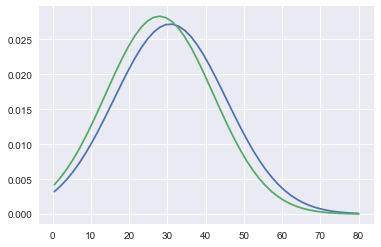

In [89]:
x_axis_vals = np.linspace(start=min_age, stop=max_age)
sns.set()
plt.plot(x_axis_vals, stat.norm.pdf(x_axis_vals, male_age_mean, male_age_std))
plt.plot(x_axis_vals, stat.norm.pdf(x_axis_vals, females_age_mean, female_age_std))


In [ ]:
# todo: randomly generate age for male and female based on distribution. Fill empty ages in dataset

In [21]:
training_data[training_data['Cabin'].isna()].size


8244

In [37]:
training_data.loc[(training_data['Sex'] == 'male' & training_data['Age'].notna()), 'Age']

TypeError: cannot compare a dtyped [bool] array with a scalar of type [bool]

In [3]:
training_data[training_data['Age'].isna() & (training_data['Cabin'].notnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S


In [6]:
avg_age = training_data[training_data['Age'].notnull()]['Age'].aggregate(np.mean)
st

29.69911764705882

In [10]:
training_data.loc[training_data['Age'].isna(), 'Age'] = avg_age

In [17]:
clear_data = training_data.dropna(how='any')
clear_data.size


2424

In [16]:
training_data.size

10692

In [21]:
training_data[training_data['Cabin'].isna()].size


8244

In [22]:
total = training_data.isnull().sum().sort_values(ascending=False)
percent_1 = training_data.isnull().sum()/training_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
